In [94]:
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [95]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\placement (1).csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [96]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [97]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: placed, Length: 1000, dtype: int64

C:\Users\SDS\AppData\Local\Temp\ipykernel_12512\3389333381.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\SDS\AppData\Local\Temp\ipykernel_12512\3389333381.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


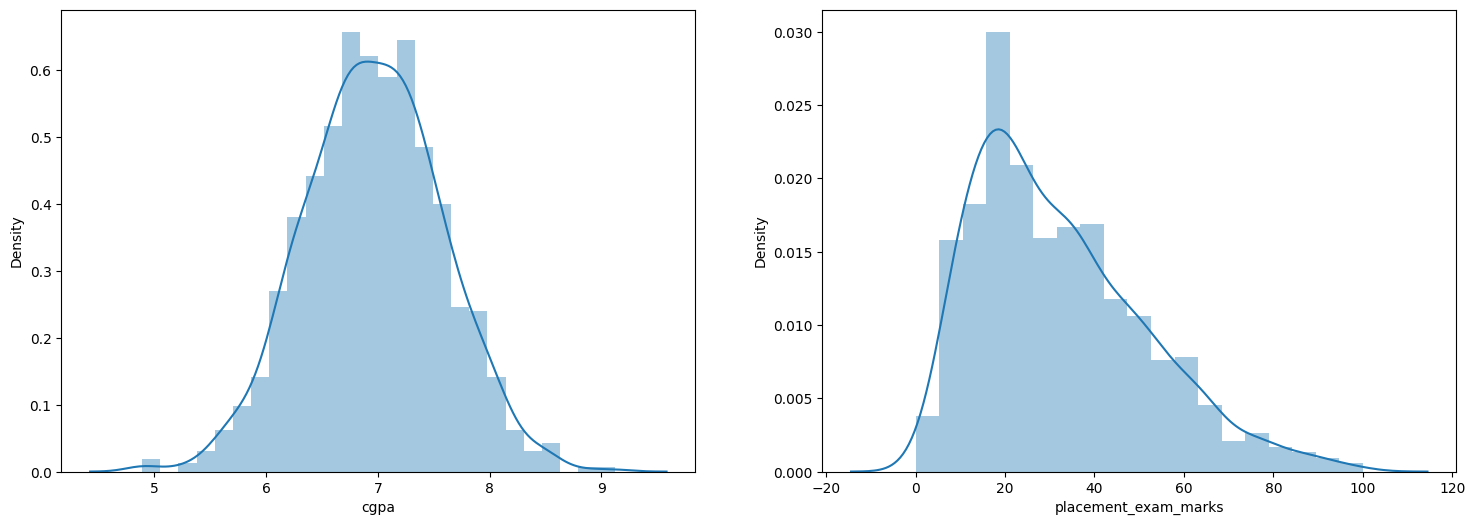

In [98]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()


# here 2 distribution ,1) normal distribution 2) rights skew data .we can not apply z-score with rights skew data .
 # if we want to appply z_score we need normal distribution data . so, our perfect model is number 1 distribution dta 

In [99]:
print('cgpa mean:', df['cgpa'].mean())
print('cgpa min_value:',df['cgpa'].min())
print('cgpa max_value:',df['cgpa'].max())
print('cgpa standard_deviation_ value:',df['cgpa'].std())

cgpa mean: 6.96124
cgpa min_value: 4.89
cgpa max_value: 9.12
cgpa standard_deviation_ value: 0.6158978751323896


In [100]:
# finding the boundary value 

print("hights_allowed:",df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest_alllowed:',df['cgpa'].mean()-3*df['cgpa'].std())

hights_allowed: 8.808933625397168
lowest_alllowed: 5.113546374602832


In [101]:
# finding the outliers 


df[(df['cgpa']>8.808 ) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [102]:
# apply trimming to remove outliers from data set 

new_df =df[(df['cgpa']<8.808) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [103]:
new_df.shape

(995, 3)

In [104]:
# apply capping to convert outliers to upper limits and lower_limits 

# finnding upper_limt and lower limit 
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
print(upper_limit)
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
print(lower_limit)

8.808933625397168
5.113546374602832


In [105]:
# capping apply 
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,

            np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [106]:
print(df['cgpa'].min())
print(df['cgpa'].max())

5.113546374602832
8.808933625397168


In [107]:
# calculating law of z_score 
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/(df['cgpa'].std())

In [108]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.372949
1,7.460000,38.0,1,0.813630
2,7.540000,40.0,1,0.944202
3,6.420000,8.0,1,-0.883807
4,7.230000,17.0,0,0.438235
...,...,...,...,...
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293
997,5.113546,34.0,0,-3.016137
998,8.620000,46.0,1,2.706925
